In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

In [2]:
breast_cancer=load_breast_cancer()

In [3]:
data= breast_cancer.data
target= breast_cancer.target

In [4]:
df= pd.DataFrame(data, columns= breast_cancer.feature_names)
df['target']= target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
X= df.iloc[:,:2].values
Y= df.iloc[:,-1].values

In [8]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
Sc= StandardScaler()
X_train_tranform= Sc.fit_transform(X_train)
X_test_transform= Sc.fit_transform(X_test)

In [10]:
classifier= KNeighborsClassifier(n_neighbors=11)

In [11]:
classifier.fit(X_train_tranform, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [12]:
y_pred= classifier.predict(X_test_transform)

In [13]:
print('Accuracy score', accuracy_score(Y_test, y_pred))

Accuracy score 0.9210526315789473


# How to select the value of K? 

In [14]:
scores= []
for i in range(1, 16):
 knn= KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tranform, Y_train)
 y_pred= knn.predict(X_test_transform)
 score= accuracy_score(Y_test, y_pred)
 scores.append(score)

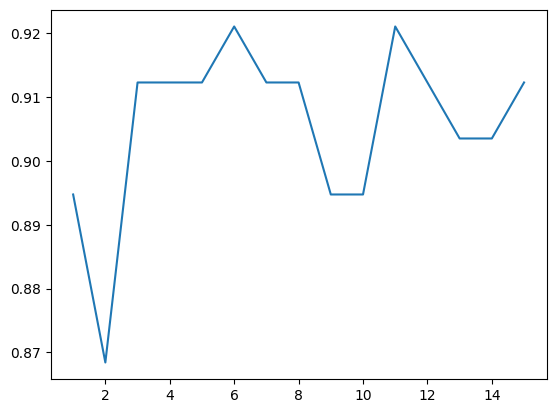

In [15]:
plt.plot(range(1,16), scores)
plt.show()

# Plot decision boundary

In [16]:
from mlxtend.plotting import plot_decision_regions

In [17]:
X.shape

(569, 2)

In [18]:
Y.shape

(569,)

In [19]:
x_min, x_max= X_train[:,0].min()-1, X_train[:,0].max()+1
y_min, y_max= X_train[:,1].min()-1, X_train[:,1].max()+1

In [20]:
step_size=0.02
xx, yy= np.meshgrid(np.arange(x_min, x_max, step_size), 
                    np.arange(y_min, y_max, step_size))

In [21]:
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [22]:
Z.shape

(1579, 1121)

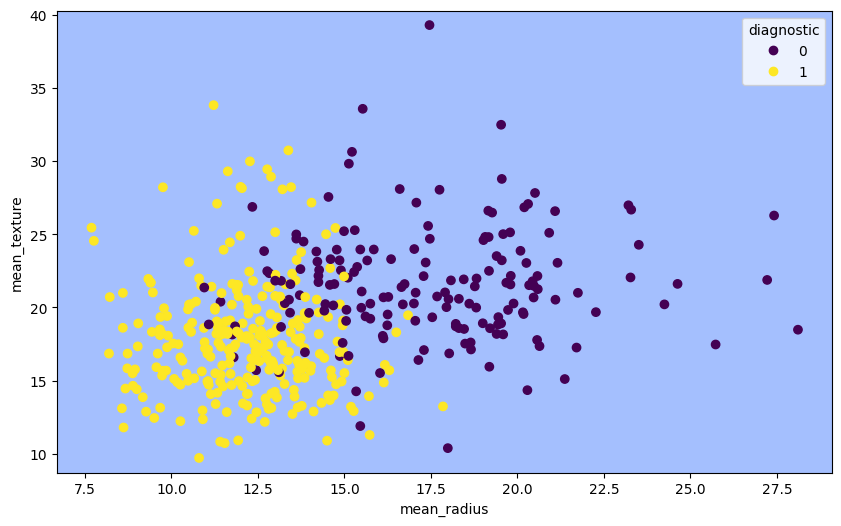

In [23]:
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
scat= plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train) 
legend1 = plt.legend(*scat.legend_elements(),
                    loc="upper right", title="diagnostic")
plt.xlabel('mean_radius')
plt.ylabel('mean_texture')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

c:\Users\SC\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

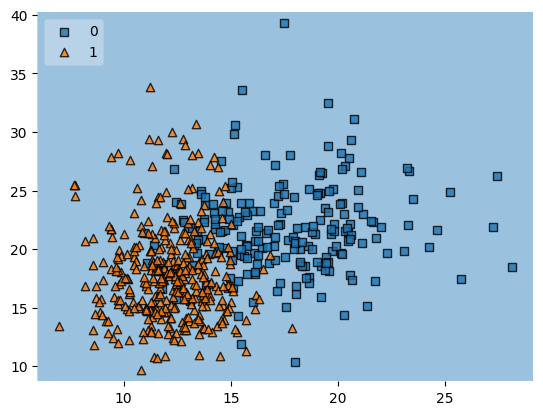

In [24]:
plot_decision_regions(X, Y, clf=classifier, legend=2)

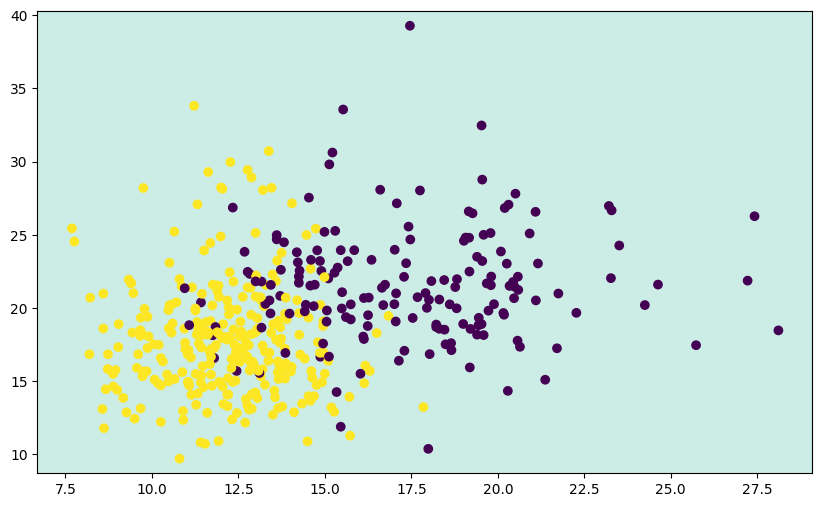

In [25]:
ax=plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.BuGn)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.show()